## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [532]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

#### Пропуски в данных отсутствуют <br>
Определим количественные признаки:

In [7]:
data.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


Определим возможное бинарные признаки, затем посмотрим, возможно какие-то из них порядковые

In [8]:
for i in data.columns:
    if (i != 'duration' and i != 'amount' and i != 'age'):
        if len(data[i].unique()) == 2:
            print (i + ' ' + str(len(data[i].unique())))

people_liable 2
telephone 2
foreign_worker 2
credit_risk 2


Посмотрим уникальные значения в остальных столбцах и распределим между категориальными и порядковыми

In [9]:
for i in data.columns:
    if ['duration', 'amount', 'age', 'telephone', 'foreign_worker', 'credit_risk'].count(i) == 0:
        print (i + ': ' + str(data[i].unique()))

status: ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
credit_history: ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
purpose: ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
savings: ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']
employment_duration: ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']
installment_rate: ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']
personal_status_sex: ['female : non-single or male : single' 'male : married/widowed'
 'female : single' 'male : divorced/separated']
other_debtors: ['none' 'guarantor' 'co-applicant']
present_residence: ['>= 7 yrs' '1 <= .

#### Количественные признаки: duration, amount, age 
#### Бинарные признаки: telephone, foreign_worker, credit_risk 
#### Порядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable
#### Категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [10]:
print(data[['amount','purpose']].groupby('purpose').mean())

                          amount
purpose                         
business             8209.333333
car (new)            5370.223301
car (used)           3066.983425
domestic appliances  2728.090909
furniture/equipment  2487.685714
others               3062.948718
radio/television     1498.000000
repairs              3180.400000
retraining           4158.041237
vacation             1205.888889


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [12]:
print('Younger than 30, rent a house: ' + str(data[(data['age'] < 30) & (data['housing'] == 'rent')]['age'].count()/data['age'].count()*100) + '%')
print('Older than 40, rent a house: ' + str(data[(data['age'] > 40) & (data['housing'] == 'rent')]['age'].count()/data['age'].count()*100) + '%')

Younger than 30, rent a house: 24.6%
Older than 40, rent a house: 18.5%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [20]:
data[(data['foreign_worker'] == 'yes') & (data['number_credits'] != '1') & (data['number_credits'] != '2-3')]['number_credits'].count()

1

### Задание 6 (1 балл)

In [533]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

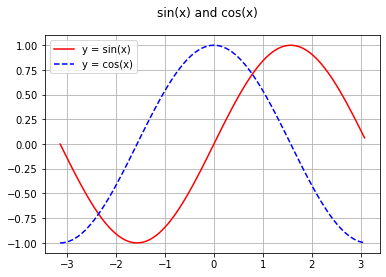

In [13]:
x = np.arange(-np.pi, np.pi, 2*np.pi/100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, c = "r", label = 'y = sin(x)')
plt.plot(x, y2, c = "b", label = 'y = cos(x)', ls = '--')
plt.legend()
plt.suptitle('sin(x) and cos(x)')
plt.grid(True)

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [124]:
gr1 = data[data['credit_risk'] == 'good'][['credit_risk', 'status']].groupby('status').count().reset_index()
gr2 = data[data['credit_risk'] == 'bad'][['credit_risk', 'status']].groupby('status').count().reset_index()

Text(0.5, 0.98, 'Status of checking account')

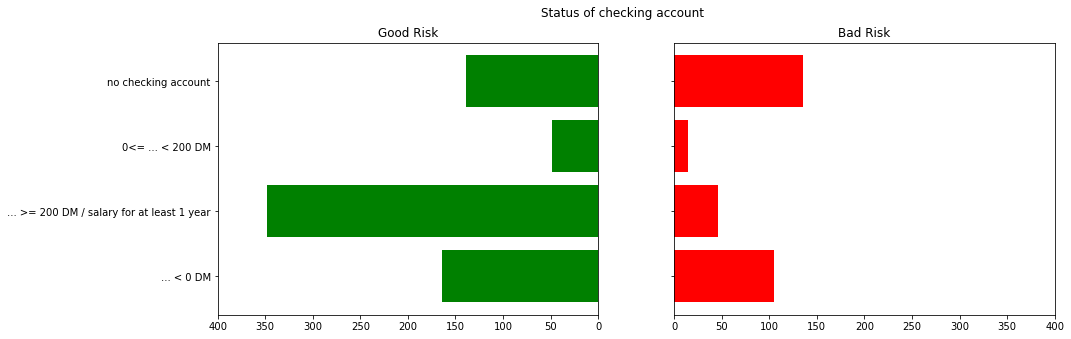

In [125]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
ax[0].barh(gr1['status'], gr1['credit_risk'], color = 'g')
ax[1].barh(gr2['status'], gr2['credit_risk'], color = 'r')
ax[0].invert_xaxis()
ax[0].set_title('Good Risk')
ax[1].set_title('Bad Risk')
ax[0].set(xlim = (400, 0))
ax[1].set(xlim = (0, 400))
fig.suptitle('Status of checking account')

Вывод: в общем случае количество положительных кейсов больше для каждого размера счета. Если рассматривать каждый график в отдельности, кредит охотнее оформляют в том случае, если на текущем счете большое количество средств. 

### Задание 8  (0.5 балла)

In [534]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

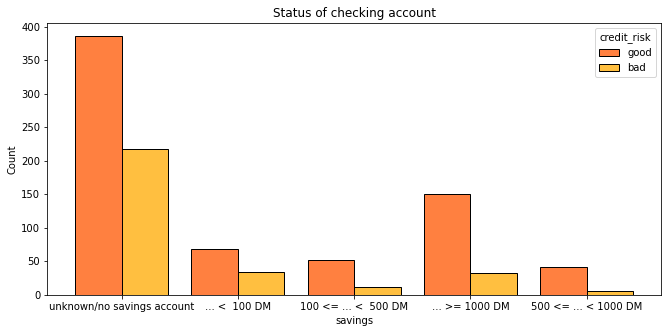

In [60]:
plt.figure(figsize=(11, 5))
sns.histplot(data, x='savings', hue = 'credit_risk', multiple='dodge', shrink=.8, palette='autumn').set_title('Status of checking account')
plt.show()

Seaborn намного быстрее, понятнее для написания и восприятия. 

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

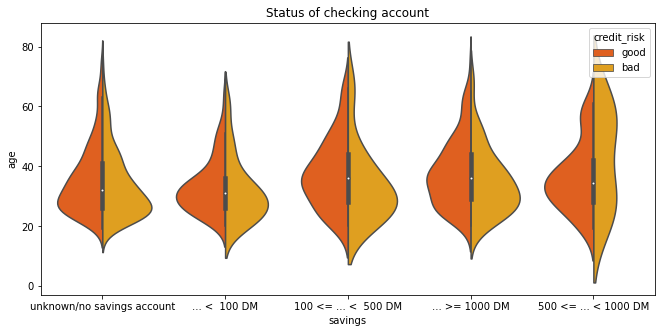

In [62]:
plt.figure(figsize=(11, 5))
sns.violinplot(data = data, x='savings', y='age', hue = 'credit_risk', split=True, shrink=.8, palette='autumn').set_title('Status of checking account')
plt.show()

Намного быстрее и понятнее...

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

<ipython-input-536-5fde1bcddd25>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  f.legend([ax1, ax2, ax3], labels=['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'],


Text(0.5, 0.98, 'Age distribution')

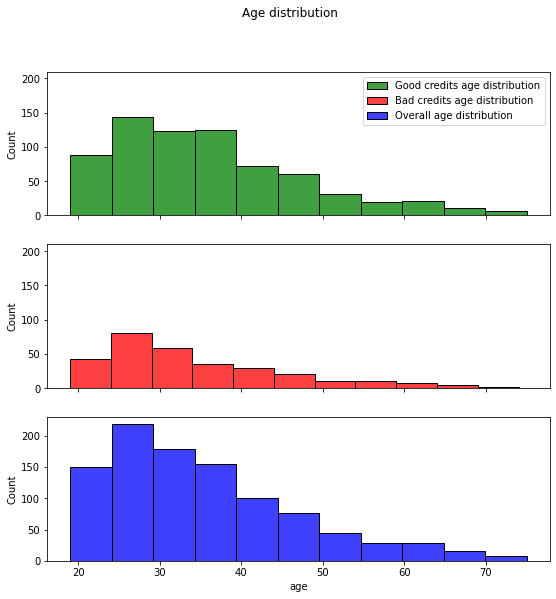

In [536]:
gr = data[data['credit_risk'] == 'good']
br = data[data['credit_risk'] == 'bad']
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 9), sharex = True)
sns.histplot(gr, x='age', bins = 11, color = 'g', ax=ax1)
sns.histplot(br, x='age', bins = 11, color = 'r', ax=ax2)
sns.histplot(data, x='age', bins = 11, color = 'b', ax=ax3)
ax1.set(ylim = (0, 210))
ax2.set(ylim = (0, 210))
f.legend([ax1, ax2, ax3], labels=['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'],
           loc=1, bbox_to_anchor=(0.9, 0.88))
f.suptitle('Age distribution')

Ну может и не намного...

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

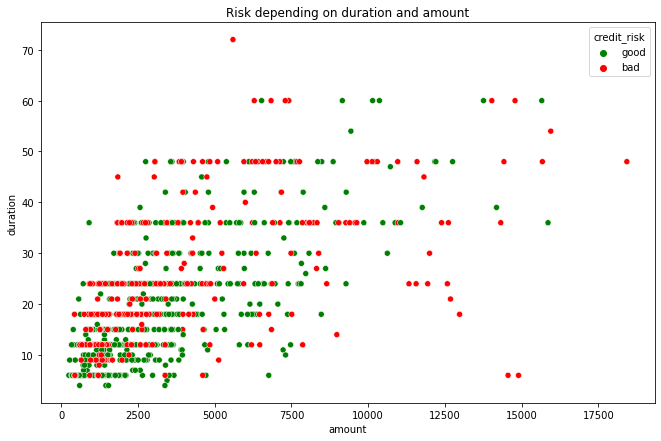

In [537]:
plt.figure(figsize=(11, 7))
sns.scatterplot(data=data, x="amount", y="duration", hue='credit_risk', palette = ['g', 'r']).set_title('Risk depending on duration and amount')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

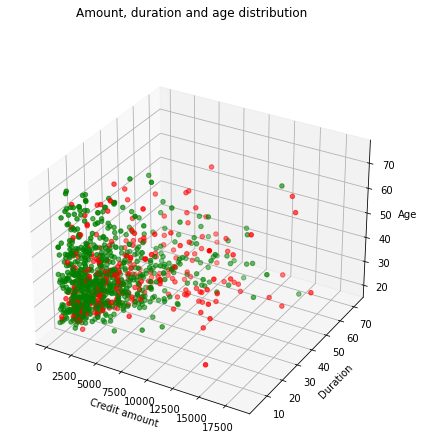

In [538]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')
x = data['amount']
y = data['duration']
z = data['age']
cr = data['credit_risk'].apply(lambda x: 'r' if x == 'bad' else 'g')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(x, y, z, c = cr)
fig.suptitle('Amount, duration and age distribution')
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [36]:
for i in data.columns:
    if ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'].count(i) != 0:
        print (i + ': ' + str(data[i].unique()))

status: ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
savings: ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']
employment_duration: ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']
installment_rate: ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']
present_residence: ['>= 7 yrs' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' '< 1 yr']
number_credits: ['1' '2-3' '4-5' '>= 6']
people_liable: ['0 to 2' '3 or more']
telephone: ['no' 'yes (under customer name)']
foreign_worker: ['no' 'yes']
credit_risk: ['good' 'bad']


Представим порядковые и бинарные признаки в числовом виде

In [539]:
st = {'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3}
sa = {'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4}
ed = {'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4}
ir = {'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3}
pr = {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3}
nc = {'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3}
pl = {'0 to 2': 0, '3 or more': 1}
tp = {'no': 0, 'yes (under customer name)': 1}
fw = {'no': 0, 'yes': 1}
cr = {'bad': 0, 'good': 1}
data['status'] = data['status'].apply(lambda x: st[x])
data['savings'] = data['savings'].apply(lambda x: sa[x])
data['employment_duration'] = data['employment_duration'].apply(lambda x: ed[x])
data['installment_rate'] = data['installment_rate'].apply(lambda x: ir[x])
data['present_residence'] = data['present_residence'].apply(lambda x: pr[x])
data['number_credits'] = data['number_credits'].apply(lambda x: nc[x])
data['people_liable'] = data['people_liable'].apply(lambda x: pl[x])
data['telephone'] = data['telephone'].apply(lambda x: tp[x])
data['credit_risk'] = data['credit_risk'].apply(lambda x: cr[x])
data['foreign_worker'] = data['foreign_worker'].apply(lambda x: fw[x])
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,all credits at this bank paid back duly,car (used),1049,0,1,0,female : non-single or male : single,none,...,car or other,21,none,for free,0,skilled employee/official,0,0,0,1
1,0,9,all credits at this bank paid back duly,others,2799,0,2,2,male : married/widowed,none,...,unknown / no property,36,none,for free,1,skilled employee/official,1,0,0,1
2,1,12,no credits taken/all credits paid back duly,retraining,841,1,3,2,female : non-single or male : single,none,...,unknown / no property,23,none,for free,0,unskilled - resident,0,0,0,1
3,0,12,all credits at this bank paid back duly,others,2122,0,2,1,male : married/widowed,none,...,unknown / no property,39,none,for free,1,unskilled - resident,1,0,1,1
4,0,12,all credits at this bank paid back duly,others,2171,0,2,0,male : married/widowed,none,...,car or other,38,bank,rent,1,unskilled - resident,0,0,1,1


Представим категориальные признаки в числовом виде с помощью функции get_dummies

In [540]:
data = pd.get_dummies(data)
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,18,1049,0,1,0,3,21,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,9,2799,0,2,2,1,36,1,1,...,0,1,0,1,0,0,0,1,0,0
2,1,12,841,1,3,2,3,23,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,...,0,1,0,1,0,0,0,0,0,1
4,0,12,2171,0,2,0,3,38,1,0,...,1,0,0,0,0,1,0,0,0,1


Итог:

In [8]:
data.describe()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,1.577000,20.903000,3271.24800,1.105000,2.384000,1.027000,1.845000,35.54200,0.407000,0.155000,...,0.13900,0.814000,0.047000,0.179000,0.107000,0.714000,0.148000,0.630000,0.022000,0.2000
std,1.257638,12.058814,2822.75176,1.580023,1.208306,1.118715,1.103718,11.35267,0.577654,0.362086,...,0.34612,0.389301,0.211745,0.383544,0.309268,0.452115,0.355278,0.483046,0.146757,0.4002
min,0.000000,4.000000,250.00000,0.000000,0.000000,0.000000,0.000000,19.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,0.000000,12.000000,1365.50000,0.000000,2.000000,0.000000,1.000000,27.00000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,1.000000,18.000000,2319.50000,0.000000,2.000000,1.000000,2.000000,33.00000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0000
75%,3.000000,24.000000,3972.25000,2.000000,4.000000,2.000000,3.000000,42.00000,1.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0000
max,3.000000,72.000000,18424.00000,4.000000,4.000000,3.000000,3.000000,75.00000,3.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [32]:
data.describe()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,3271.24800,1.105000,2.384000,1.027000,1.845000,35.54200,0.407000,0.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,2822.75176,1.580023,1.208306,1.118715,1.103718,11.35267,0.577654,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,250.00000,0.000000,0.000000,0.000000,0.000000,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1365.50000,0.000000,2.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2319.50000,0.000000,2.000000,1.000000,2.000000,33.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,3972.25000,2.000000,4.000000,2.000000,3.000000,42.00000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,18424.00000,4.000000,4.000000,3.000000,3.000000,75.00000,3.000000,1.000000,1.000000,1.000000,1.000000


Отмасштабируем некоторые признаки с помощью интервалов, а также поменяем значения целевой переменной на -1/1, чтобы в дальнейшем использовать это для обучения линейного классификатора

In [541]:
from sklearn.preprocessing import LabelEncoder
data1 = pd.cut(data['age'].astype(int), 5)
data['age_int'] = label.fit_transform(data1)
data1 = pd.cut(data['duration'].astype(int), 5)
data['dur_int'] = label.fit_transform(data1)
data1 = pd.cut(data['amount'].astype(int), 5)
data['amo_int'] = label.fit_transform(data1)

data = data.drop(['age', 'duration', 'amount'], axis = 1)

crr = {0: -1, 1: 1}
data['credit_risk'] = data['credit_risk'].apply(lambda x: crr[x])

In [542]:
def predict(Xtest: np.array, bw: np.array) -> np.array:
    return np.sign(np.dot(X_test, bw))

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1)
y = data['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Обучим линейный классификатор с помощью градиентного спуска
# В качестве верхней оценки возьмем логистическую функцию
w = np.random.rand(48, 1)
mloss = 10000
for i in range(1000):  # Количество итераций градиентного спуска
    xw = np.dot(X_train, w)
    M = (xw.T * y_train.to_numpy()).T
    los = np.log(1+np.exp(-M))
    #print('Loss: ' + str(los.mean()))
    if(los.mean() < mloss):
        mloss = los.mean()
        bw = w
    #xn = X_train.T.to_numpy()
    dw = ((X_train.T.to_numpy() * y_train.to_numpy()) / (1 + np.exp(M)).T).mean(axis = 1)  # Расчет градиента
    nu = 1/(i+1)
    w = (w.T + nu * dw).T
    
# Нас интересует переменная bw, которая является набором весов получившейся модели
    
accuracy_score(y_test, predict(X_test, bw))

0.728

Вывод: результат зависит от случайных начальных величин, но в среднем точность получается выше 0.7